In [1]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt

from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope

In [2]:
df = pd.read_csv('diabetes.csv')
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
678,3,121,52,0,0,36.0,0.127,25,1
356,1,125,50,40,167,33.3,0.962,28,1
32,3,88,58,11,54,24.8,0.267,22,0
556,1,97,70,40,0,38.1,0.218,30,0
454,2,100,54,28,105,37.8,0.498,24,0


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Local Outlier Factor

Use KNN to flag outliers

Compare the average density of candidate point with that of its neighborhood

In [4]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.2)
X = df[['Pregnancies', 'Glucose', 'BloodPressure']]
y_pred = lof.fit_predict(X)
n_outliers = (y_pred == -1).sum()

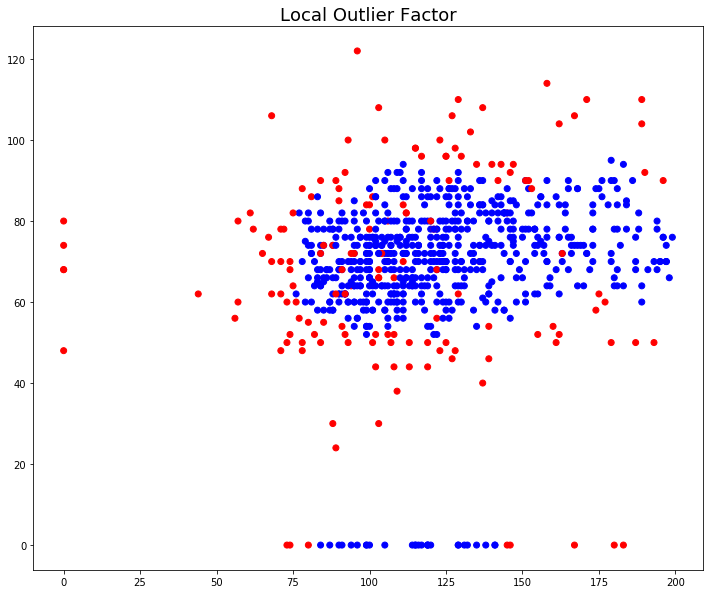

In [5]:
colors = np.array(['r', 'b'])
plt.figure(figsize=(12, 10))
plt.title('Local Outlier Factor', size=18)
plt.scatter(df['Glucose'], df['BloodPressure'], color=colors[(y_pred + 1) // 2])
plt.show()

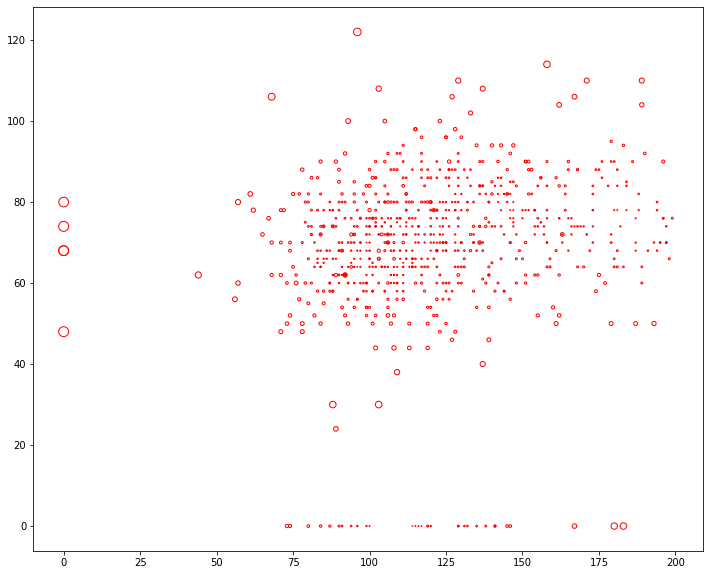

In [6]:
X_scores = lof.negative_outlier_factor_
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.figure(figsize=(12, 10))
plt.scatter(df['Glucose'], df['BloodPressure'], s=100 * radius, edgecolors='r', facecolors='none', label='Outlier scores')
plt.show()

### Isolation Forest

based on random forests

randomly select a feature and a split on the feature till a sample is isolated; the smaller the number of splits, the higher probability of being outliers

In [7]:
ifs = IsolationForest(contamination=0.19)
y_pred = ifs.fit_predict(df[['Glucose', 'BloodPressure']])
n_outliers = (y_pred == -1).sum()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


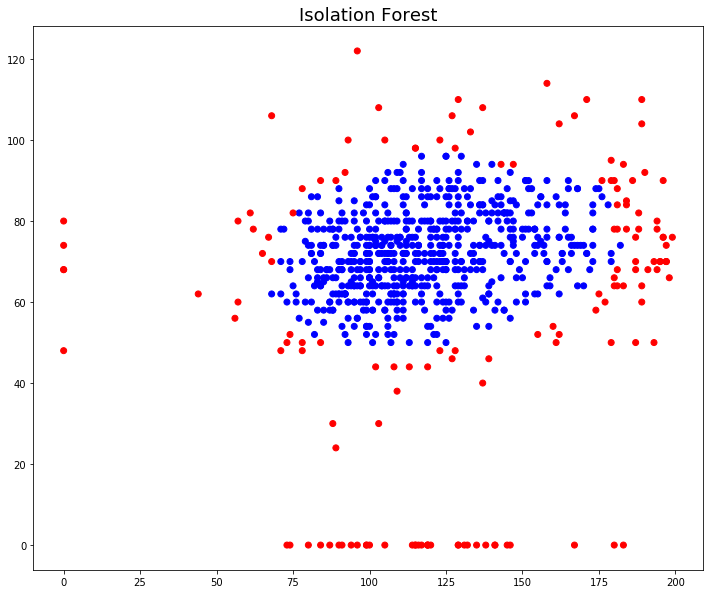

In [8]:
colors = np.array(['r', 'b'])
plt.figure(figsize=(12, 10))
plt.title('Isolation Forest', size=18)
plt.scatter(df['Glucose'], df['BloodPressure'], color=colors[(y_pred + 1) // 2])
plt.show()

In [9]:
xx, yy = np.meshgrid(np.linspace(0, 200, 500), np.linspace(0, 150, 500))
print('xx = ', xx.ravel())
print('yy = ', yy.ravel())
z = ifs.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
z

xx =  [  0.           0.4008016    0.80160321 ... 199.19839679 199.5991984
 200.        ]
yy =  [  0.   0.   0. ... 150. 150. 150.]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The following kwargs were not used by contour: 'linwidths'
  after removing the cwd from sys.path.


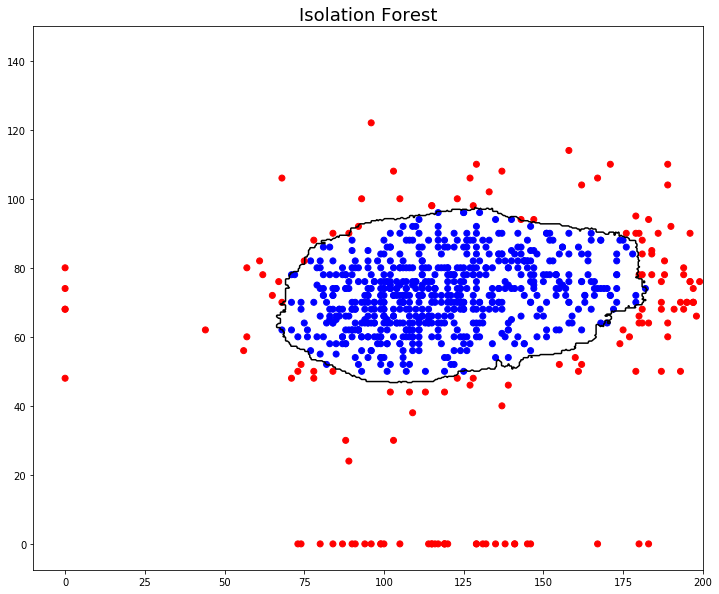

In [10]:
plt.figure(figsize=(12, 10))
plt.title('Isolation Forest', size=18)
plt.scatter(df['Glucose'], df['BloodPressure'], color=colors[(y_pred + 1) // 2])
plt.contour(xx, yy, z, levels=[0], linwidths=2, colors='black')
plt.show()

### Elliptic Envelope

Assume data is drawn from a known distribution, e.g. normal distribution; evelope is drawn based on Minimum Convariance Determinant

In [11]:
ee = EllipticEnvelope(support_fraction=1., contamination=0.19)
y_pred = ee.fit_predict(df[['Glucose', 'BloodPressure']])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The following kwargs were not used by contour: 'linwidths'
  after removing the cwd from sys.path.


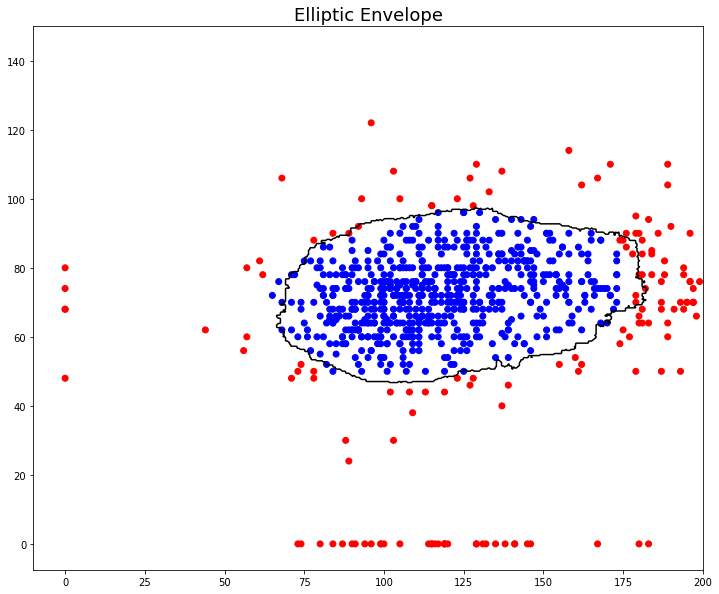

In [12]:
plt.figure(figsize=(12, 10))
plt.title('Elliptic Envelope', size=18)
plt.scatter(df['Glucose'], df['BloodPressure'], color=colors[(y_pred + 1) // 2])
plt.contour(xx, yy, z, levels=[0], linwidths=2, colors='black')
plt.show()

### Novelty detection

Outliers are datapoints that differ significantly from other data points in the same dataset while novelties are datapoints encountered in the prediction in test/vaildation samples that differ significantly from points in the training sample.

Outliers cannot form a dense cluster by definition but novelties can.

In [13]:
x_training = df.loc[df['Outcome'] == 0]
x_testing = df.loc[df['Outcome'] == 1]

In [14]:
lof_novelty = LocalOutlierFactor(n_neighbors=5, contamination='auto', novelty=True)
lof_novelty.fit(x_training[['Glucose', 'BloodPressure']])
y_pred = lof_novelty.predict(x_testing[['Glucose', 'BloodPressure']])

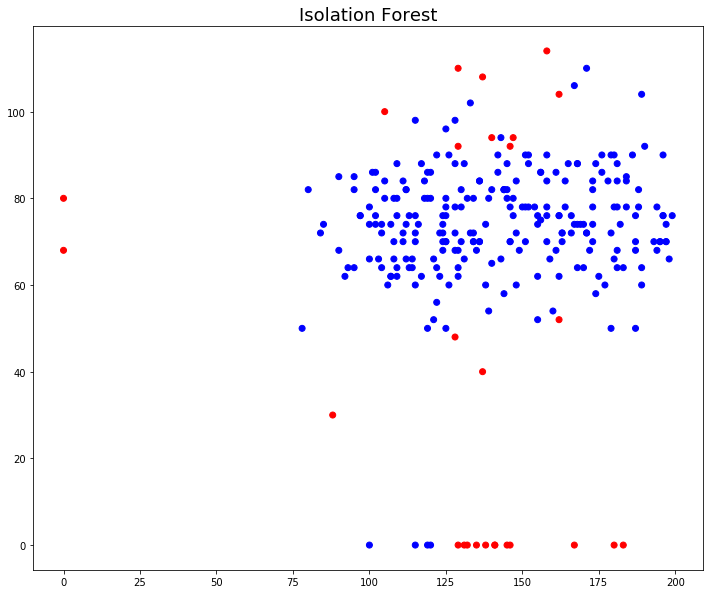

In [15]:
colors = np.array(['r', 'b'])
plt.figure(figsize=(12, 10))
plt.title('Isolation Forest', size=18)
plt.scatter(x_testing['Glucose'], x_testing['BloodPressure'], color=colors[(y_pred + 1) // 2])
plt.show()